In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('C:/Users/abc/Desktop/Personal tracker/Personal tracker.csv')

In [6]:
print(df.head(30))

          Date        Category                 Description  Income  Expense
0   01/03/2023          Salary            Monthly paycheck  5500.0      NaN
1   01/03/2023            Rent       Studio apartment rent     NaN  1350.00
2   02/03/2023       Utilities            Electricity bill     NaN    98.75
3   04/03/2023         Grocery     Weekly supermarket trip     NaN   127.40
4   05/03/2023  Transportation          Monthly metro pass     NaN   120.00
5   08/03/2023       Insurance    Health insurance premium     NaN   245.50
6   10/03/2023   Entertainment        Netflix subscription     NaN    19.99
7   12/03/2023          Dining          Team lunch at work     NaN    35.50
8   15/03/2023         Grocery      Organic store purchase     NaN    89.90
9   17/03/2023   Personal Care          Haircut & grooming     NaN    45.00
10  19/03/2023        Shopping              New work shoes     NaN    89.99
11  22/03/2023          Travel   Train tickets to hometown     NaN   175.00
12  25/03/20

In [8]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Income'] = df['Income'].fillna(0)
df['Expense'] = df['Expense'].fillna(0)

print(df.head())

        Date        Category              Description  Income  Expense
0 2023-03-01          Salary         Monthly paycheck  5500.0     0.00
1 2023-03-01            Rent    Studio apartment rent     0.0  1350.00
2 2023-03-02       Utilities         Electricity bill     0.0    98.75
3 2023-03-04         Grocery  Weekly supermarket trip     0.0   127.40
4 2023-03-05  Transportation       Monthly metro pass     0.0   120.00


In [9]:
from sqlalchemy import create_engine

db_name = 'budget_tracker'
db_user = 'postgres'
db_password = 'Cigars&Coffee'
db_host = 'localhost'
db_port = '5432'

engine = create_engine(f'postgresql+psycopg2://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')

with engine.connect() as conn:
    print("Connected successfully!")


Connected successfully!


In [10]:
df.columns = df.columns.str.lower()

In [11]:
print(df.head())

        date        category              description  income  expense
0 2023-03-01          Salary         Monthly paycheck  5500.0     0.00
1 2023-03-01            Rent    Studio apartment rent     0.0  1350.00
2 2023-03-02       Utilities         Electricity bill     0.0    98.75
3 2023-03-04         Grocery  Weekly supermarket trip     0.0   127.40
4 2023-03-05  Transportation       Monthly metro pass     0.0   120.00


In [12]:
df.to_sql('budget_data', engine, if_exists='append', index=False)


47

In [13]:
query = "SELECT * FROM budget_data ORDER BY date;"
df_all = pd.read_sql_query(query, engine)
print(df_all.head(15))


    id        date        category               description  income  expense
0   49  2023-03-01            Rent     Studio apartment rent     0.0  1350.00
1    2  2023-03-01            Rent     Studio apartment rent     0.0  1350.00
2    1  2023-03-01          Salary          Monthly paycheck  5500.0     0.00
3   48  2023-03-01          Salary          Monthly paycheck  5500.0     0.00
4   50  2023-03-02       Utilities          Electricity bill     0.0    98.75
5    3  2023-03-02       Utilities          Electricity bill     0.0    98.75
6    4  2023-03-04         Grocery   Weekly supermarket trip     0.0   127.40
7   51  2023-03-04         Grocery   Weekly supermarket trip     0.0   127.40
8    5  2023-03-05  Transportation        Monthly metro pass     0.0   120.00
9   52  2023-03-05  Transportation        Monthly metro pass     0.0   120.00
10   6  2023-03-08       Insurance  Health insurance premium     0.0   245.50
11  53  2023-03-08       Insurance  Health insurance premium    

In [14]:
query = """
SELECT 
SUM(income) AS total_income,
SUM(expense) AS total_expense,
SUM(income) - SUM(expense) AS total_balance
FROM budget_data;
"""
df_totals = pd.read_sql_query(query, engine)
print(df_totals)

   total_income  total_expense  total_balance
0       34400.0        21123.8        13276.2


In [15]:
query = """
SELECT
category,
SUM(expense) AS total_spent
FROM budget_data
WHERE expense > 0
GROUP BY category 
ORDER BY total_spent DESC;
"""
df_spending = pd.read_sql_query(query, engine)
print(df_spending)

          category  total_spent
0             Rent      8100.00
1         Shopping      3479.96
2          Grocery      1498.00
3           Travel      1250.00
4        Utilities      1173.78
5      Investments      1000.00
6   Transportation       901.20
7    Entertainment       844.98
8        Education       598.00
9        Insurance       491.00
10          Health       465.50
11             Car       379.90
12          Dining       298.50
13   Personal Care       268.00
14           Gifts       200.00
15         Charity       100.00
16   Subscriptions        49.98
17   Miscellaneous        25.00


In [16]:
query = """
SELECT 
    date,
    SUM(income) AS daily_income,
    SUM(expense) AS daily_expense
FROM budget_data
GROUP BY date
ORDER BY date;
"""

df_trend = pd.read_sql_query(query, engine)
print(df_trend)


          date  daily_income  daily_expense
0   2023-03-01       11000.0        2700.00
1   2023-03-02           0.0         197.50
2   2023-03-04           0.0         254.80
3   2023-03-05           0.0         240.00
4   2023-03-08           0.0         491.00
5   2023-03-10           0.0          39.98
6   2023-03-12           0.0          71.00
7   2023-03-15           0.0         179.80
8   2023-03-17           0.0          90.00
9   2023-03-19           0.0         179.98
10  2023-03-22           0.0         350.00
11  2023-03-25           0.0         124.60
12  2023-03-27           0.0         300.00
13  2023-03-29           0.0         130.00
14  2023-03-30           0.0          57.50
15  2023-04-01       11000.0        2700.00
16  2023-04-03           0.0         159.98
17  2023-04-05           0.0         420.50
18  2023-04-07           0.0          91.20
19  2023-04-09           0.0         170.00
20  2023-04-12           0.0         300.00
21  2023-04-15           0.0    

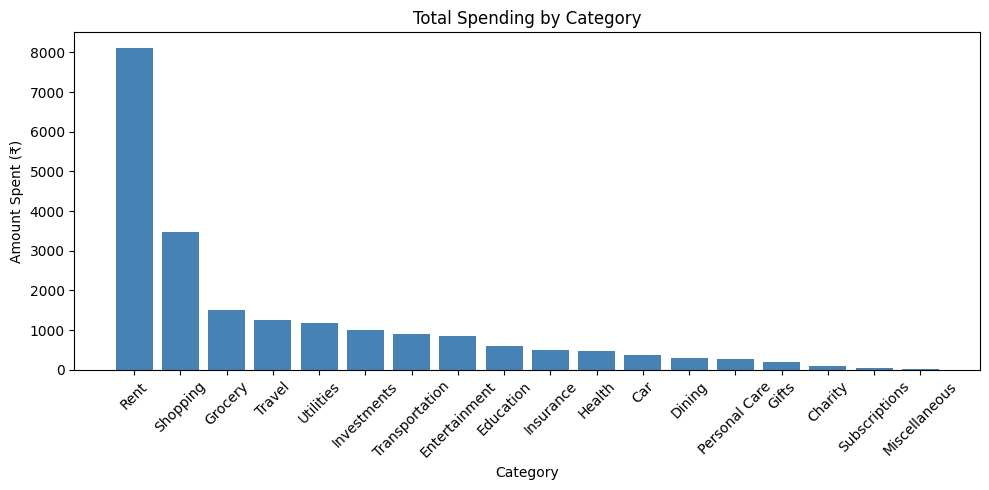

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(df_spending['category'], df_spending['total_spent'], color='steelblue')
plt.title('Total Spending by Category')
plt.xlabel('Category')
plt.ylabel('Amount Spent (₹)')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()




In [18]:
plt.savefig("Total_Spending_by_Category.png")


<Figure size 640x480 with 0 Axes>

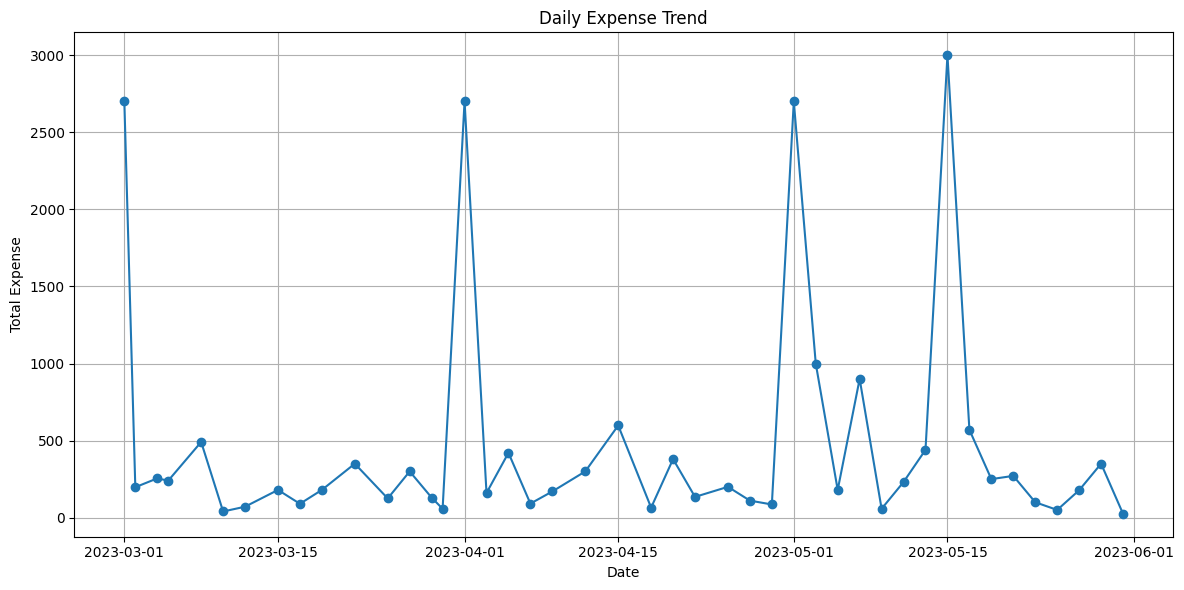

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(df_trend['date'], df_trend['daily_expense'], marker='o', linestyle='-')
plt.title('Daily Expense Trend')
plt.xlabel('Date')
plt.ylabel('Total Expense')
plt.grid(True)
plt.tight_layout()
plt.savefig('daily_expense_trend.png')
plt.show()

In [20]:
query = """
SELECT 
    DATE_TRUNC('week', date) AS week_start,
    SUM(expense) AS total_expense
FROM budget_data
WHERE expense > 0
GROUP BY week_start
ORDER BY week_start;
"""

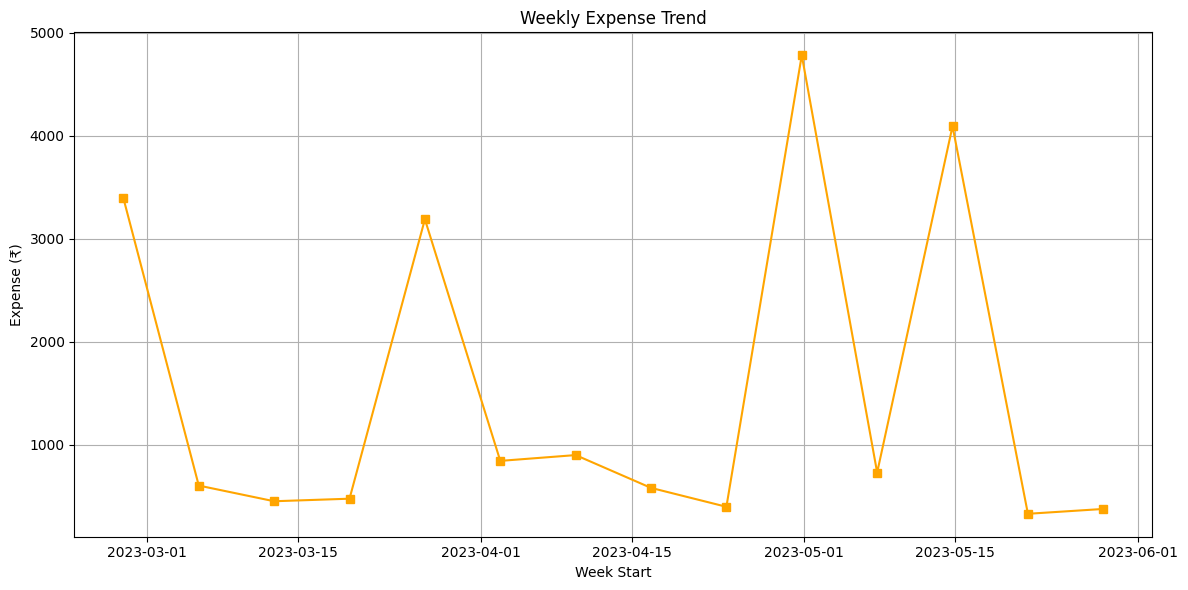

In [21]:
df_weekly = pd.read_sql_query(query, engine)
df_weekly['week_start'] = pd.to_datetime(df_weekly['week_start'])

plt.figure(figsize=(12, 6))
plt.plot(df_weekly['week_start'], df_weekly['total_expense'], marker='s', linestyle='-', color='orange')
plt.title('Weekly Expense Trend')
plt.xlabel('Week Start')
plt.ylabel('Expense (₹)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
query = """
SELECT 
    DATE_TRUNC('month', date) AS month,
    SUM(expense) AS total_expense
FROM budget_data
WHERE expense > 0
GROUP BY month
ORDER BY month;
"""

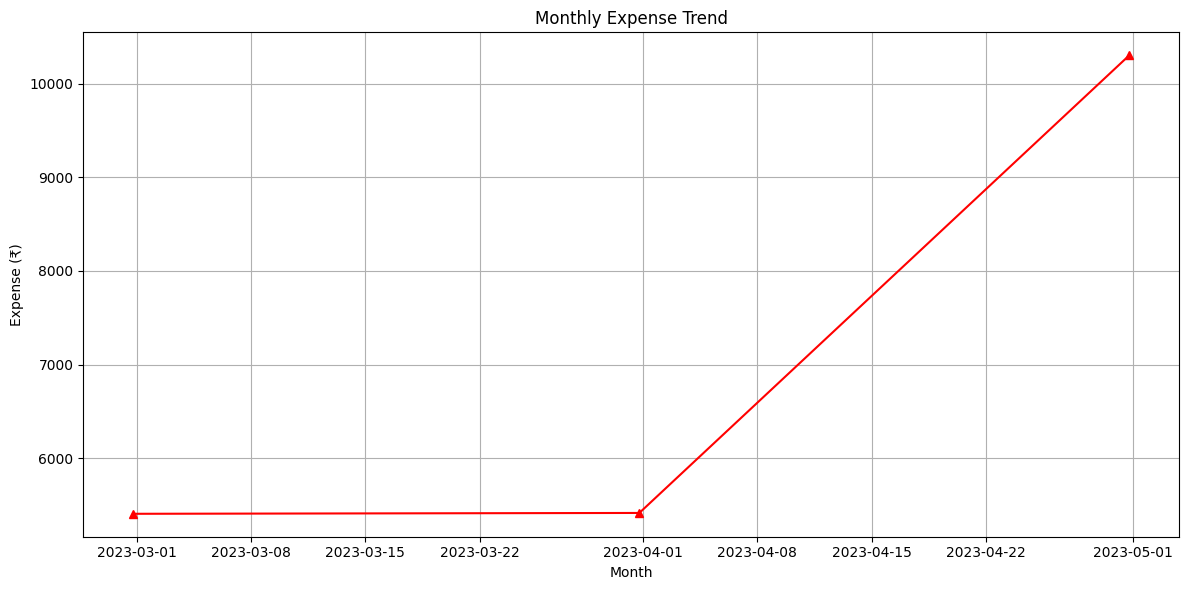

In [23]:
df_monthly = pd.read_sql_query(query, engine)
df_monthly['month'] = pd.to_datetime(df_monthly['month'])

plt.figure(figsize=(12, 6))
plt.plot(df_monthly['month'], df_monthly['total_expense'], marker='^', linestyle='-', color='red')
plt.title('Monthly Expense Trend')
plt.xlabel('Month')
plt.ylabel('Expense (₹)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
query = """
SELECT 
    DATE_TRUNC('month', date) AS month,
    SUM(income) AS total_income,
    SUM(expense) AS total_expense,
    ROUND(
        CASE 
            WHEN SUM(income) > 0 THEN (SUM(income) - SUM(expense)) / SUM(income)
            ELSE 0
        END, 4
    ) AS savings_rate
FROM budget_data
GROUP BY month
ORDER BY month;
"""
df_savings = pd.read_sql_query(query, engine)
df_savings['month'] = pd.to_datetime(df_savings['month'])
print(df_savings)


                      month  total_income  total_expense  savings_rate
0 2023-02-28 18:30:00+00:00       11000.0        5406.16        0.5085
1 2023-03-31 18:30:00+00:00       11000.0        5415.18        0.5077
2 2023-04-30 18:30:00+00:00       12400.0       10302.46        0.1692


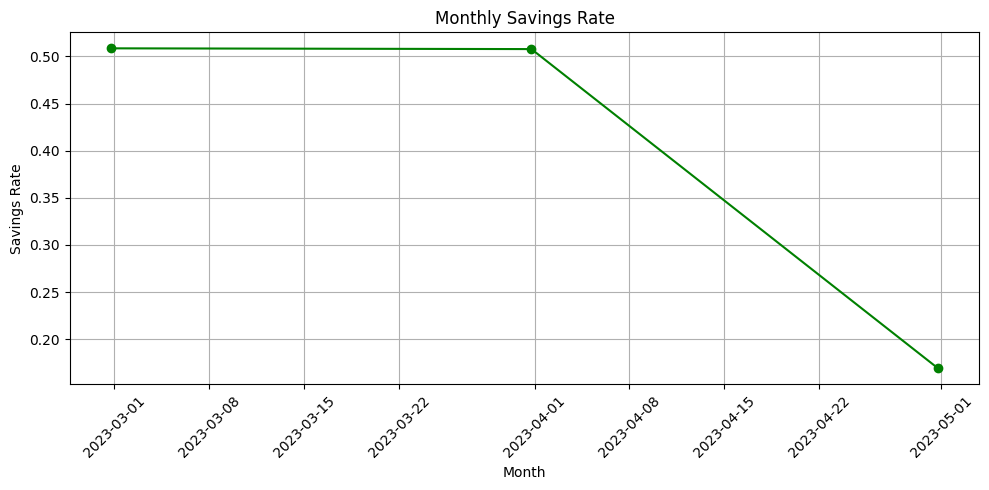

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(df_savings['month'], df_savings['savings_rate'], marker='o', linestyle='-', color='green')
plt.title('Monthly Savings Rate')
plt.xlabel('Month')
plt.ylabel('Savings Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
import pandas as pd
from sqlalchemy import create_engine

In [27]:
query = "SELECT NOW();"
df = pd.read_sql_query(query, engine)
df


,now
0,2025-04-30 13:24:37.079219+00:00


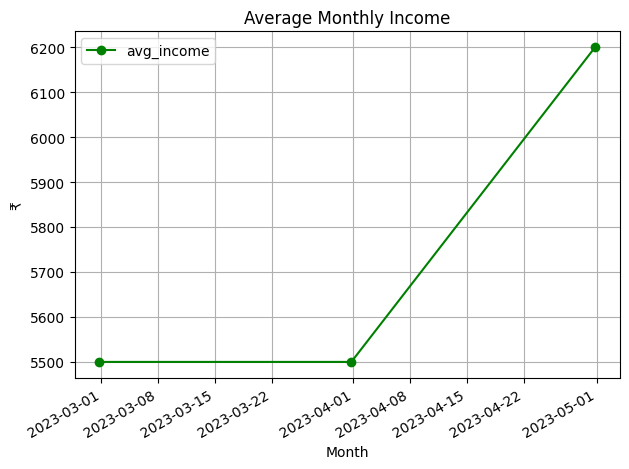

In [48]:
query = """
SELECT DATE_TRUNC('month', date) AS month,
       AVG(income) AS avg_income
FROM budget_data
WHERE income > 0
GROUP BY Month
ORDER BY Month;
"""
df = pd.read_sql_query(query, engine)
df.plot(kind='line', x='month', y='avg_income', marker='o', linestyle='-',
        title='Average Monthly Income', color='green')
plt.ylabel('₹')
plt.xlabel('Month')
plt.grid(True)
plt.tight_layout()
plt.show()

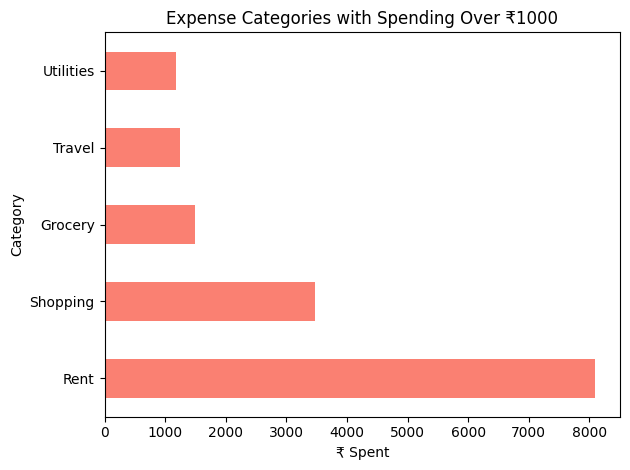

In [46]:
query = """
SELECT category, SUM(expense) AS total_spent
FROM budget_data
WHERE expense > 0
GROUP BY category
HAVING SUM(expense) > 1000
ORDER BY total_spent DESC;
"""
df = pd.read_sql_query(query, engine)

df.plot(kind='barh', x='category', y='total_spent', legend=False,
        title='Expense Categories with Spending Over ₹1000', color='salmon')
plt.xlabel('₹ Spent')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


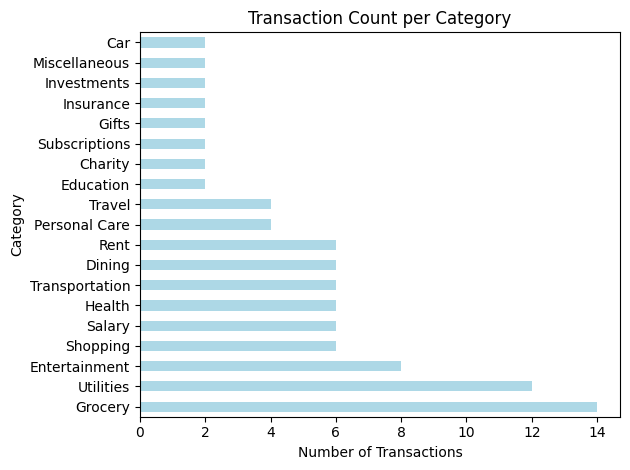

In [49]:
query = """
SELECT category, COUNT(*) AS transaction_count
FROM budget_data
GROUP BY category
ORDER BY transaction_count DESC;
"""
df = pd.read_sql_query(query, engine)

df.plot(kind='barh', x='category', y='transaction_count', 
        color='lightblue', legend=False, title='Transaction Count per Category')
plt.xlabel('Number of Transactions')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

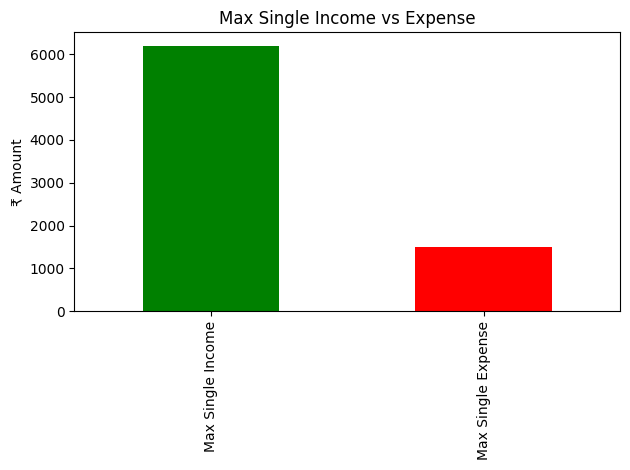

In [50]:
query = """
SELECT 
    MAX(income) AS max_income,
    MAX(expense) AS max_expense
FROM budget_data;
"""
df = pd.read_sql_query(query, engine)

df_melted = df.melt(value_vars=['max_income', 'max_expense'], 
                    var_name='type', 
                    value_name='amount')

df_melted['type'] = df_melted['type'].map({
    'max_income': 'Max Single Income',
    'max_expense': 'Max Single Expense'
})

df_melted.plot(kind='bar', x='type', y='amount', color=['green', 'red'], 
               legend=False, title='Max Single Income vs Expense')
plt.ylabel('₹ Amount')
plt.xlabel('')
plt.tight_layout()
plt.show()


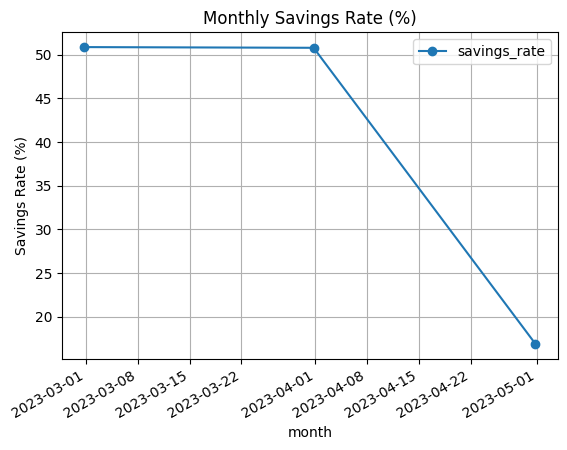

📉 Months with savings rate below 10%:
Empty DataFrame
Columns: [month, savings_rate]
Index: []


In [ ]:
query = """
SELECT 
    DATE_TRUNC('month', date) AS month,
    SUM(income) AS total_income,
    SUM(expense) AS total_expense,
    ROUND(100.0 * (SUM(income) - SUM(expense)) / NULLIF(SUM(income), 0), 2) AS savings_rate
FROM budget_data
GROUP BY month
ORDER BY month;
"""

df = pd.read_sql_query(query, engine)
df['month'] = pd.to_datetime(df['month'])

# Line chart of savings rate
df.plot(x='month', y='savings_rate', kind='line', marker='o', title='Monthly Savings Rate (%)')
plt.ylabel('Savings Rate (%)')
plt.grid(True)
plt.show()

# Print months with savings rate < 10%
low_savings = df[df['savings_rate'] < 10]
print("Months with savings rate below 10%:")
print(low_savings[['month', 'savings_rate']])
